#Introduction to Data Science - 22KDL Lab 03: Principal Component Analysis:
**Name:** Phan Văn Hoàng <br>
**ID:** 22280033 <br>
**Class:** 22KDL1


##**Problem Statement**:
###Introduction:
The objective of this report is to utilize a real-world dataset from a cancer regression dataset to implement Principal Component Analysis (PCA) and evaluate its efficacy in reducing the dimensionality of high-dimensional data while retaining its fundamental characteristics.

## **Data description:**


The dataset comprises two separate CSV files, both of which can be accessed using the `read_csv(file_path)` function in Python's `pandas` library. <br>



In [414]:
import pandas as pd
import numpy as np

#Loading dataset
df_household = pd.read_csv('avg-household-size.csv')
df_cancer = pd.read_csv('cancer_reg.csv')


The first dataset, named `df_household`, contains information on household size and geographical location. Each column within this dataset is described as follows:

1. `statefips`: Represents the FIPS code corresponding to the state.
2. `countyfips`: Indicates the FIPS code associated with the county or census area within the state.
3. `avghouseholdsize`: The average household size in the region.
4. `geography`: The geographical location, typically represented as the county or census area name followed by the state name.

In [415]:
#Showing the features names from dataset 1
df_household.keys()

Index(['statefips', 'countyfips', 'avghouseholdsize', 'geography'], dtype='object')

The second dataset, named `df_cancer`, contains health-related information for various regions. Each column within this dataset is detailed as follows:

1. `avganncount`: Average number of cancer diagnoses per year
2. `avgdeathsperyear`: Average number of deaths due to cancer per year
3. `target_deathrate`: Cancer death rate (per 100,000 population)
4. `incidencerate`: Cancer incidence rate
5. `medincome`: Median income in the area
6. `popest2015`: Estimated population in 2015
7. `povertypercent`: Percentage of population below poverty level
8. `studypercap`: Number of clinical trials related to cancer conducted per capita
9. `binnedinc`: Binned average income
10. `medianage`: Median age in the area
11. `medianagemale`: Median age of males in the area
12. `medianagefemale`: Median age of females in the area
13. `geography`: Geographic location (County name)
14. `percentmarried`: Percentage of population married
15. `pctnohs18_24`: Percentage of population aged 18-24 with no high school diploma
16. `pcths18_24`: Percentage of population aged 18-24 with high school diploma
17. `pctsomecol18_24`: Percentage of population aged 18-24 with some college education
18. `pctbachdeg18_24`: Percentage of population aged 18-24 with bachelor's degree
19. `pcths25_over`: Percentage of population aged 25 and over with high school diploma
20. `pctbachdeg25_over`: Percentage of population aged 25 and over with bachelor's degree
21. `pctemployed16_over`: Percentage of population aged 16 and over employed
22. `pctunemployed16_over`: Percentage of population aged 16 and over unemployed
23. `pctprivatecoverage`: Percentage of population with private health coverage
24. `pctprivatecoveragealone`: Percentage of population with private health coverage alone (no public assistance)
25. `pctempprivcoverage`: Percentage of population with employer-based private health coverage
26. `pctpubliccoverage`: Percentage of population with publicly provided health coverage
27. `pctpubliccoveragealone`: Percentage of population with publicly provided health coverage alone
28. `pctwhite`: Percentage of population White
29. `pctblack`: Percentage of population Black
30. `pctasian`: Percentage of population Asian
31. `pctotherrace`: Percentage of population of other races
32. `pctmarriedhouseholds`: Percentage of married households
33. `birthrate`: Birth rate in the area







In [416]:
#Showing the features names from dataset 2
df_cancer.keys()

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

To gain a deeper understanding of the dataset, we utilized the `info()`,`head()`,`shape` and `describe()` functions in Python's `pandas` library. These functions provide valuable insights into the dataset's structure, the initial rows of data, the dimensions of the dataset and offer valuable insights into the numerical variables in the dataset.

In [417]:
#Getting information of dataset 1
df_household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


In [418]:
#Getting information of dataset 2
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [419]:
#Getting the first 5 rows of the dataset 1
df_household.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [420]:
#Getting the first 5 rows of the dataset 2
df_cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [421]:
#Print the dimensions of the dataset 1
df_household.shape

(3220, 4)

In [422]:
#Print the dimensions of the dataset 2
df_cancer.shape

(3047, 33)

In [423]:
#Print the summary statistic of the dataset 1
df_household.describe()

,statefips,countyfips,avghouseholdsize
count,3220.000000,3220.000000,3220.000000
mean,31.290683,102.922050,2.540755
std,16.277207,106.693846,0.267654
min,1.000000,1.000000,1.370000
25%,19.000000,35.000000,2.380000
50%,30.000000,79.000000,2.510000
75%,46.000000,133.000000,2.650000
max,72.000000,840.000000,4.730000


In [424]:
#Print the summary statistic of the dataset 2
df_cancer.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


##**Data Preprocessing:**

### Encode categorical features

As part of the data preprocessing steps, we extracted a list of column names corresponding to categorical features present in the dataset. This allows us to identify and distinguish categorical variables from numerical ones.


In [425]:
#Get the datatype of dataset 1
data_types_1 = df_household.dtypes

# Get the categorical features (select columns with the data types are 'object' or 'category' and convert the features names to the list)
categorical_features_1 = data_types_1[data_types_1 == 'object'].index.tolist()
categorical_features_1.extend(data_types_1[data_types_1 == 'category'].index.tolist())

# Print the list of categorical features
print("Categorical Features from dataset 1:", categorical_features_1)

Categorical Features from dataset 1: ['geography']


In [426]:
#Get the datatype of dataset 2
data_types_2 = df_cancer.dtypes

# Get the categorical features (select columns with the data types are 'object' or 'category' and convert the features names to the list)
categorical_features_2 = data_types_2[data_types_2 == 'object'].index.tolist()
categorical_features_2.extend(data_types_2[data_types_2 == 'category'].index.tolist())

# Print the list of categorical features
print("Categorical Features from dataset 2:", categorical_features_2)

Categorical Features from dataset 2: ['binnedinc', 'geography']


Before encoding, we looked at the number of categories in both dataset 1 and 2.

In [427]:
# Dataset 1 (geography)
import numpy as np
np.unique(df_household.geography)

array(['Abbeville County, South Carolina', 'Acadia Parish, Louisiana',
       'Accomack County, Virginia', ..., 'Zapata County, Texas',
       'Zavala County, Texas', 'Ziebach County, South Dakota'],
      dtype=object)

In [428]:
#Dataset 2 (geography)
import numpy as np
np.unique(df_cancer.geography)

array(['Abbeville County, South Carolina', 'Acadia Parish, Louisiana',
       'Accomack County, Virginia', ..., 'Yuma County, Colorado',
       'Zapata County, Texas', 'Zavala County, Texas'], dtype=object)

In [429]:
#Dataset 2 (binnedinc)
import numpy as np
np.unique(df_cancer.binnedinc)

array(['(34218.1, 37413.8]', '(37413.8, 40362.7]', '(40362.7, 42724.4]',
       '(42724.4, 45201]', '(45201, 48021.6]', '(48021.6, 51046.4]',
       '(51046.4, 54545.6]', '(54545.6, 61494.5]', '(61494.5, 125635]',
       '[22640, 34218.1]'], dtype=object)

Due to the presence of categorical features with a large number of unique categories in both dataset 1 and dataset 2, encoding them would lead to a significant increase in dimensionality. We opted to drop all these categorical features before implementing PCA."

In [430]:
df_household = df_household.drop(columns = 'geography')
df_cancer = df_cancer.drop(columns =['geography', 'binnedinc'])

### Handling missing and duplicated values

To ensure the integrity and reliability of the dataset, we will identify any missing values present in the dataset using `isnull()`.

In [431]:
# Check missing values in dataset 1
df_household.isnull().sum()

# -> There are no missing values in dataset 1

statefips           0
countyfips          0
avghouseholdsize    0
dtype: int64

In [432]:
# Check missing values in dataset 2
df_cancer.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
medianage                     0
medianagemale                 0
medianagefemale               0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarriedhouseholds          0
birthrate                     0
dtype: i

There are missing values from `pctsomecol18_24 `, `pctemployed16_over` and `pctprivatecoveragealone` column.

Given that approximately half of the dataset 2 (`df_cancer`) contains missing values, removing rows or columns with missing values would result in significant data loss. Therefore, to preserve as much information as possible, we chose to handle missing values by replacing them with the mean using the `fillna()`function from the `pandas` library

In [433]:
import pandas as pd

# Impute missing values with mean from dataset 2 (df_cancer)
df_cancer = df_cancer.fillna(df_cancer.mean())

df_cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


After handling missing values, we used `duplicated()` function to identify rows that are exact copies of one another.

In [434]:
# Check duplicated rows in dataset 1
df_household.duplicated().sum()

# -> There are no duplicated rows in dataset 1

0

In [435]:
# Check duplicated rows in dataset 2
df_cancer.duplicated().sum()

# -> There are no duplicated rows in dataset 2

0

### Removing outliers

In this step, outliers were identified and removed using the Z-score method. Data points with a Z-score greater than 3 or less than -3 were considered outliers, and were consequently removed all numerical columns in both Dataset 1 and Dataset 2. <br>
The Z-score is calculated using the formula:
$$\text{Z-score} = \dfrac{\text{value}-\text{mean}}{\text{standard deviation}}$$
where `value` represents the data point, `mean` is the mean of the dataset, and `standard deviation` is the standard deviation.

**Dataset 1:** <br>


In [436]:
df_household.shape

(3220, 3)

In [437]:
#Removing outliers from dataset 1
upper_limits = df_household.mean() + 3 * df_household.std()

# Filter the DataFrame to remove outliers from each column
for column in df_household.columns:
    df_household = df_household[df_household[column] <= upper_limits[column]]

In [438]:
df_household.shape

(3098, 3)

**Datset 2:**

In [439]:
df_cancer.shape

(3047, 31)

In [440]:
#Removing outliers from dataset 2
upper_limits = df_cancer.mean() + 3 * df_cancer.std()

for column in df_cancer.columns:
    df_cancer = df_cancer[df_cancer[column] <= upper_limits[column]]


In [441]:
df_cancer.shape

(2502, 31)

### Data normalization for numerical features

**Split dataset into features and target:**

In dataset 1, we chose `avghouseholdsize`column as the target and all the remaining columns are features.

In [442]:
# Split dataset 1 into features and target: (df_household)
X1 = df_household.drop("avghouseholdsize",axis='columns')
y1 = df_household.avghouseholdsize

X1.head()

,statefips,countyfips
0,2,13
2,2,20
4,2,60
5,2,68
7,2,90


Likewise, in dataset 2, we chose `target_deathrate`column as the target and all the remaining columns are features.

In [443]:
# Split dataset 2 into features and target: (df_cancer)
X2 = df_cancer.drop("target_deathrate",axis='columns')
y2 = df_cancer.target_deathrate

X2.head()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,...,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
2,102.0,50,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,...,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,...,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,...,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
5,428.0,152,505.4,52313,61023,15.6,180.259902,45.4,43.5,48.0,...,38.800000,32.6,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476


**Apply scaling:**

 In this stage, we will employ the `MinMaxScaler` method from the `sklearn.preprocessing` library to fit and transform our data, ensuring that numerical features are normalized to a specified range. <br>
 The `MinMaxScaler` is calculated using the formula:
 $$X_\text{scaled} = \dfrac{X - X_\text{min}}{X_\text{max} - X_\text{min}} $$
Where:
*   $X$ is the original feature value.
*   $X_\text{min}$ is the minimum feature value in the dataset.
*   $X_\text{max}$ is the maximum feature value in the dataset.
*   $X_\text{scaled}$ is the rescaled feature value within the range $[0,1]$.






**Dataset 1:**

In [444]:
#Normalizing data from dataset 1 (df_household)
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on the training data and transform numerical features
X1_scaled = scaler.fit_transform(X1)

X1_scaled

array([[0.01408451, 0.02843602],
       [0.01408451, 0.0450237 ],
       [0.01408451, 0.13981043],
       ...,
       [0.77464789, 0.09478673],
       [0.77464789, 0.09952607],
       [0.77464789, 0.1042654 ]])

**Dataset 2:**

In [445]:
#Normalizing data from dataset 2 (df_cancer)

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on the training data and transform numerical features
X2_scaled = scaler.fit_transform(X2)

X2_scaled


array([[0.29312526, 0.27837515, 0.71970688, ..., 0.14872426, 0.62463876,
        0.5294662 ],
       [0.02003374, 0.02807646, 0.35304894, ..., 0.22164556, 0.65889509,
        0.32271486],
       [0.08857022, 0.11887694, 0.5642502 , ..., 0.10993244, 0.58508334,
        0.39837316],
       ...,
       [0.4124141 , 0.00716846, 0.62483492, ..., 0.13718676, 0.58599571,
        0.67264679],
       [0.4124141 , 0.02927121, 0.62483492, ..., 0.17198408, 0.74598878,
        0.6561563 ],
       [0.4124141 , 0.02688172, 0.62483492, ..., 0.1094334 , 0.69329333,
        0.77719401]])

## **Implement PCA**



### Dataset 1

We employed `scikit-learn` to conduct Principal Component Analysis (PCA) on our preprocessed dataset. Following this, we visualized the principal components to gain insights into the data's structure.


Because dataset 1 just have 2 features, that means we  explored the dataset using only two principal components for simplified visualization.

In [446]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Initialize PCA with 2 components
pca = PCA(n_components =2)

X1_pca = pca.fit_transform(X1_scaled)

# Explained variance ratio for each principal component
print('Explained variance ratio for each principal component:\n')
print('PC1:', pca.explained_variance_ratio_[0])
print('\nPC2:', pca.explained_variance_ratio_[1])

Explained variance ratio for each principal component:

PC1: 0.6264514742503834

PC2: 0.3735485257496165


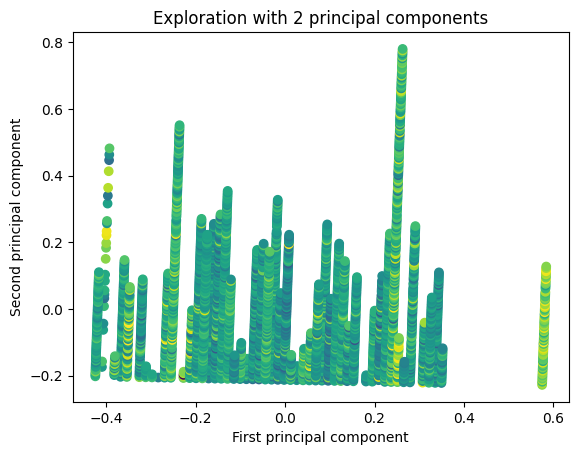

In [447]:
#Visualize the Principal components
plt.scatter(X1_pca[:, 0], X1_pca[:, 1], c=y1)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Exploration with 2 principal components')
plt.show()

### Dataset 2

Likewise, in dataset 2, we also explored the dataset using only two principal components for simplified visualization.

In [448]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Initialize PCA with 2 components
pca = PCA(n_components =2)

X2_pca = pca.fit_transform(X2_scaled)

# Explained variance ratio for each principal component
print('Explained variance ratio for each principal component:\n')
print('PC1:', pca.explained_variance_ratio_[0])
print('\nPC2:', pca.explained_variance_ratio_[1])

Explained variance ratio for each principal component:

PC1: 0.3342483937039408

PC2: 0.16922526205756364


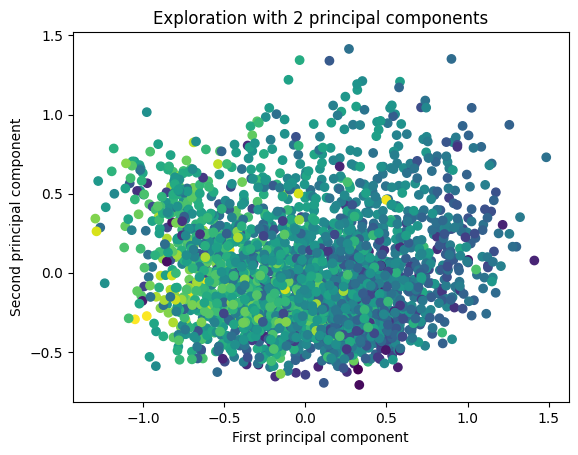

In [449]:
#Visualize the Principal components
plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=y2)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Exploration with 2 principal components')
plt.show()

After that, we explored the dataset using three principal components.

In [450]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize PCA with 3 components
pca = PCA(n_components = 3)

X2_pca = pca.fit_transform(X2_scaled)

# Explained variance ratio for each principal component
print('Explained variance ratio for each principal component:\n')
print('PC1:', pca.explained_variance_ratio_[0])
print('\nPC2:', pca.explained_variance_ratio_[1])
print('\nPC3:', pca.explained_variance_ratio_[2])

Explained variance ratio for each principal component:

PC1: 0.3342483937039205

PC2: 0.16922526202277693

PC3: 0.0784703615027066


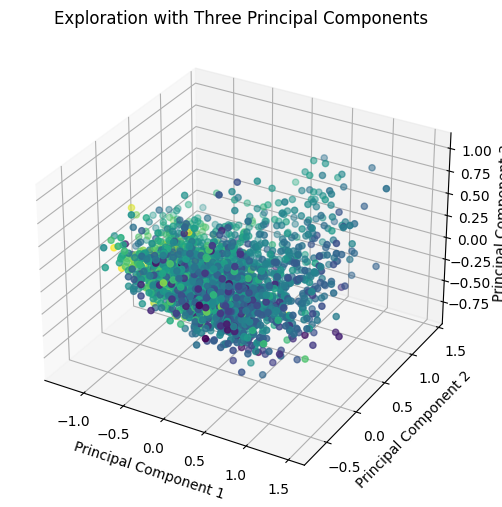

In [451]:
#Visualize the principal components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2_pca[:, 0], X2_pca[:, 1], X2_pca[:, 2], c=y2, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Exploration with Three Principal Components')
plt.show()

Finally, we also conducted experiments with varying numbers of principal components and visualized the cumulative sum of the explained variance ratio captured by each principal component.

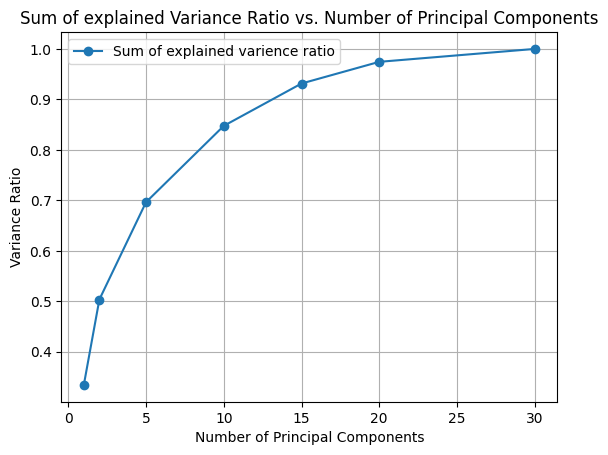

In [452]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Define a range of numbers of principal components to experiment with
n_components_range = [1,2,5,10,15,20,30]

# Initialize lists to store variance ratio
variance_ratios = []

# Iterate over different numbers of principal components
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(X2_scaled)
    variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance ratio as a function of the number of components
plt.plot(n_components_range, variance_ratios, marker='o',label = 'Sum of explained varience ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Sum of explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.legend()
plt.show()


## **Dimensionality Reduction and compare the performance of machine learning models**

### Dataset 1

To reduce the dimensionality of the dataset and determine an appropriate number of dimensions while retaining the majority of the information, we set a threshold of 0.95. This indicates our aim to retain 95% of the information in dataset 1. By applying PCA with this threshold, we can automatically find the number of principal components necessary.

In [453]:
from sklearn.decomposition import PCA

threshold = 0.95  # Set the threshold for explained variance ratio

pca = PCA(threshold)
X1_pca = pca.fit_transform(X1_scaled)

n_components = pca.n_components_
print('The number of principal components to retain ',threshold*100,'% of the variance in the dataset 1 is: ',n_components)

The number of principal components to retain  95.0 % of the variance in the dataset 1 is:  2


In [454]:
X1_pca.shape

(3098, 2)

In [455]:
X1.shape

(3098, 2)

After that, we compared the performance of machine learning models on both the original and reduced-dimensional datasets.

First, we built `LinearRegression` model utilizing  original dataset 1.

In [456]:
#Splitting the dataset to the ratio 80:20
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2,random_state = 30)

In [457]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Fit the Linear Regression model to the training data
model = LinearRegression()
reg_model = model.fit(X1_train, y1_train)

y1_pred_test = reg_model.predict(X1_test)

#Evaluation metrics
mse = mean_squared_error(y1_test,y1_pred_test)
print("MSE (Mean squared error): ",mse)

rmse = np.sqrt(mse)
print("RMSE (Root mean squared error): ",rmse)

r2 = r2_score(y1_test,y1_pred_test)
print("R2: ",r2)

# Evaluate the accuracy of the model on the test data
accuracy = model.score(X1_test, y1_test)
print('The accuracy of the model on the original test dataset 1 is: ',accuracy)

MSE (Mean squared error):  0.05126170425467282
RMSE (Root mean squared error):  0.22641047735180636
R2:  0.0071880737704370645
The accuracy of the model on the original test dataset 1 is:  0.0071880737704370645


Then, we built `LinearRegression` model utilizing reduced-dimensional datasets.

In [458]:
#Splitting the dataset to the ratio 80:20
from sklearn.model_selection import train_test_split
X1_train_pca,X1_test_pca,y1_train,y1_test = train_test_split(X1_pca, y1, test_size = 0.2, random_state = 30)

In [459]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Fit the Linear Regression model to the training data
model = LinearRegression()
reg_model = model.fit(X1_train_pca, y1_train)

y1_pred_test = reg_model.predict(X1_test_pca)

#Evaluation metrics
mse = mean_squared_error(y1_test,y1_pred_test)
print("MSE (Mean squared error): ",mse)

rmse = np.sqrt(mse)
print("RMSE (Root mean squared error): ",rmse)

r2 = r2_score(y1_test,y1_pred_test)
print("R2: ",r2)


# Evaluate the accuracy of the model on the test data
accuracy = model.score(X1_test_pca, y1_test)
print('The accuracy of the model on the reduced-dimensional test dataset 1 is: ',accuracy)

MSE (Mean squared error):  0.05126170425467283
RMSE (Root mean squared error):  0.2264104773518064
R2:  0.0071880737704368425
The accuracy of the model on the reduced-dimensional test dataset 1 is:  0.0071880737704368425


An accuracy score of `0.007` for a regression model, whether applied to the original dataset or the PCA-transformed dataset, suggests that the model's predictions deviate substantially from the true values. This indicates poor predictive performance, where the model's output is significantly different from the actual target values.

### Dataset 2

Likewise, in dataset 2, we set a threshold of 0.95. This indicates our aim to retain 95% of the information in dataset 2. By applying PCA with this threshold, we can automatically find the number of principal components necessary.

In [460]:
from sklearn.decomposition import PCA

threshold = 0.95  # Set the threshold for explained variance ratio

pca = PCA(threshold)
X2_pca = pca.fit_transform(X2_scaled)

n_components = pca.n_components_
print('The number of principal components to retain ',threshold*100,'% of the variance in the dataset 1 is: ',n_components)

The number of principal components to retain  95.0 % of the variance in the dataset 1 is:  17


In [461]:
X2_pca.shape

(2502, 17)

In [462]:
X2.shape

(2502, 30)

So that means we chose 17 out of 30 principal components to retain 95% of the information of dataset 2.

After that, we also compared the performance of machine learning models on both the original and reduced-dimensional datasets.

First, we built `LinearRegression` model utilizing  original dataset 2.

In [463]:
#Splitting the dataset to the ratio 80:20
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size = 0.2,random_state = 30)

In [464]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit the Linear Regression model to the training data
model = LinearRegression()
reg_model = model.fit(X2_train, y2_train)

#Evaluation metrics
y2_pred_test = reg_model.predict(X2_test)

mse = mean_squared_error(y2_test,y2_pred_test)
print("MSE (Mean squared error): ",mse)

rmse = np.sqrt(mse)
print("RMSE (Root mean squared error): ",rmse)

r2 = r2_score(y2_test,y2_pred_test)
print("R2: ",r2)


# Evaluate the accuracy of the model on the test data
accuracy = model.score(X2_test, y2_test)
print('The accuracy of the model on the original test dataset 2 is: ',accuracy)

MSE (Mean squared error):  338.1527451751176
RMSE (Root mean squared error):  18.388929962755245
R2:  0.5157736812269649
The accuracy of the model on the original test dataset 2 is:  0.5157736812269649


Then, we built `LinearRegression` model utilizing reduced-dimensional dataset 2.

In [465]:
#Splitting the dataset to the ratio 80:20
from sklearn.model_selection import train_test_split
X2_train_pca,X2_test_pca,y2_train,y2_test = train_test_split(X2_pca, y2, test_size = 0.2, random_state = 30)

In [466]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the Linear Regression model to the training data
model = LinearRegression()
reg_model = model.fit(X2_train_pca, y2_train)

#Evaluation metrics
y2_pred_test = reg_model.predict(X2_test_pca)

mse = mean_squared_error(y2_test,y2_pred_test)
print("MSE (Mean squared error): ",mse)

rmse = np.sqrt(mse)
print("RMSE (Root mean squared error): ",rmse)

r2 = r2_score(y2_test,y2_pred_test)
print("R2: ",r2)

# Evaluate the accuracy of the model on the test data
accuracy = model.score(X2_test_pca, y2_test)
print('The accuracy of the model on the reduced-dimensional test dataset 2 is: ',accuracy)

MSE (Mean squared error):  350.0461467663206
RMSE (Root mean squared error):  18.709520217427293
R2:  0.49874262602374564
The accuracy of the model on the reduced-dimensional test dataset 2 is:  0.49874262602374564


## **Interpretation and Analysis**

### Analyze the results obtained from the PCA transformation and dimensionality reduction

To analyze the results obtained from the PCA transformation and dimensionality reduction (utilizing dataset 2 for better analysis), we followed a systematic approach:

Initially, we initialized PCA with 10 components

In [467]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# We use dataset 2 for better visualization

# Initialize PCA with the number of components
pca = PCA(n_components = 10)  # We utilized 10 components

X2_pca = pca.fit_transform(X2_scaled)

**1. Variance Explained:** <br>
This analysis included calculating the explained variance ratio for each principal component and computing the cumulative explained variance ratio. <br>
Subsequently, we generated a plot illustrating  cumulative explained variance ratios across different numbers of principal components, providing insights into the optimal number of components to retain.

Variance explained:

Explained Variance Ratio: [0.33424839 0.16922526 0.07847036 0.06391084 0.05044343 0.04129025
 0.03220366 0.02808551 0.02585069 0.02379455]
Cumulative Explained Variance Ratio: [0.33424839 0.50347366 0.58194402 0.64585486 0.69629829 0.73758854
 0.76979219 0.7978777  0.82372839 0.84752294]


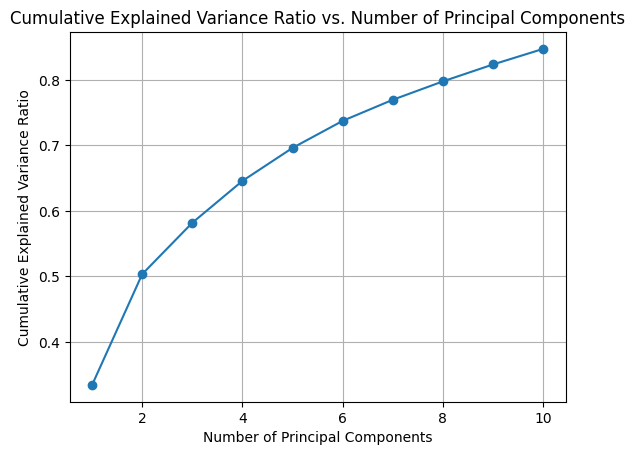

In [468]:
# Variance explained
print('Variance explained:\n')
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cumulative_variance_ratio)

# Plot cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In addition, we generated a bar plot illustrating the principal component index along the x-axis and the percentage of variance explained by each component along the y-axis.

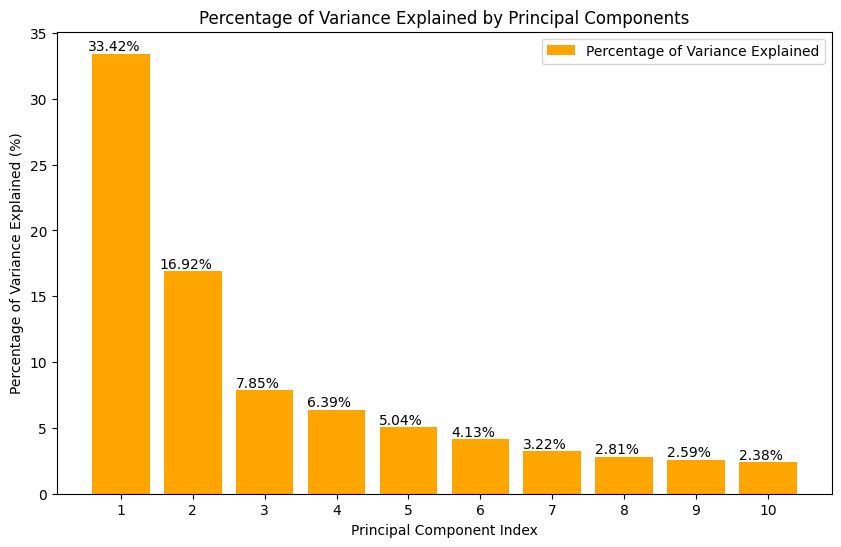

In [469]:
import matplotlib.pyplot as plt

# Principal component index
component_index = range(1, pca.n_components_ + 1)

# Percentage of variance explained
variance_explained = pca.explained_variance_ratio_ * 100

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(component_index, variance_explained, color='orange')
plt.xlabel('Principal Component Index')
plt.ylabel('Percentage of Variance Explained (%)')
plt.title('Percentage of Variance Explained by Principal Components')
plt.legend([bars], ['Percentage of Variance Explained'])

# Annotating each bar with the corresponding percentage value
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005,
             f'{variance_explained[i]:.2f}%', ha='center', va='bottom')

# Setting the tick labels for the x-axis
plt.xticks(component_index)

plt.show()



**2. Comparing Model Accuracy with Various Principal Components**




In [470]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Lists to store number of components and corresponding PCA accuracies and accuracy with original dataset
n_components_list = []
pca_accuracy_list = []
original_accuracy_list = []

# Range of number of principal components to explore
n_components_range  = np.arange(1, 31)

print('The accuracy of Linear Regression model using PCA dataset 2 with:\n')

for n_components in n_components_range:
    # Transform the dataset using the fitted PCA
    pca = PCA(n_components= n_components)
    pca.fit(X2_scaled)
    X2_pca = pca.fit_transform(X2_scaled)

    # Split the transformed dataset into training and testing sets
    X2_pca_train, X2_pca_test, y2_train, y2_test = train_test_split(X2_pca,y2,test_size = 0.2,random_state = 42)
    model = LinearRegression()

     # Train the Linear Regression model on the transformed training data
    reg_model = model.fit(X2_pca_train,y2_train)
    accuracy = model.score(X2_pca_test,y2_test)

    # Print the accuracy for the current number of components
    print('*',n_components,' components: Accuracy: ',accuracy)

    # Append number of components and accuracy to lists
    n_components_list.append(n_components)
    pca_accuracy_list.append(accuracy)

    # Train and evaluate Linear Regression model using original dataset 2
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)
    model = LinearRegression()
    reg_model = model.fit(X2_train, y2_train)
    original_accuracy = model.score(X2_test, y2_test)

    # Append original dataset accuracy to list
    original_accuracy_list.append(original_accuracy)

The accuracy of Linear Regression model using PCA dataset 2 with:

* 1  components: Accuracy:  0.2285766676218386
* 2  components: Accuracy:  0.240199771697982
* 3  components: Accuracy:  0.24026418071536226
* 4  components: Accuracy:  0.3103315307512474
* 5  components: Accuracy:  0.40972154052766585
* 6  components: Accuracy:  0.43449978993394867
* 7  components: Accuracy:  0.43443139793769725
* 8  components: Accuracy:  0.4338982676378321
* 9  components: Accuracy:  0.43225616173369863
* 10  components: Accuracy:  0.4307220885648494
* 11  components: Accuracy:  0.4433889343514953
* 12  components: Accuracy:  0.44592157461571746
* 13  components: Accuracy:  0.4637812029111724
* 14  components: Accuracy:  0.46570460326665397
* 15  components: Accuracy:  0.46884509684528397
* 16  components: Accuracy:  0.47216173589824917
* 17  components: Accuracy:  0.4712966071271818
* 18  components: Accuracy:  0.47459430614726705
* 19  components: Accuracy:  0.47564360557988383
* 20  components: Ac

Then we ploted the number of principal components against the accuracy, adding a line representing the accuracy of the Linear Regression model using the original dataset 2 to the plot,

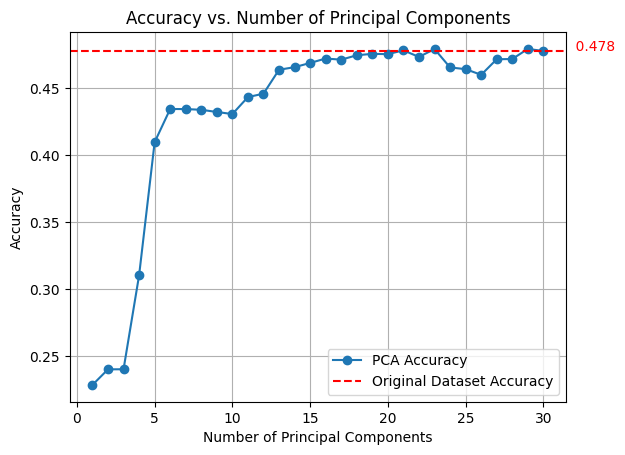

In [471]:
# Plotting
plt.plot(n_components_list, pca_accuracy_list, marker='o', label='PCA Accuracy')
plt.axhline(y=original_accuracy, color='r', linestyle='--', label='Original Dataset Accuracy')
plt.text(n_components_list[-1] + 0.1, original_accuracy, f'       {round(original_accuracy,3)}', color='r')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.grid(True)
plt.legend()
plt.show()

### Interpret the principal components and their corresponding eigenvectors

**Interpretation:**
*   `Principal components (PCs)` capture the most significant sources of variability in the data. Each principal component represents a different direction in the feature space, with the first principal component explaining the most variance.
*   `Eigenvectors` are associated with principal components. By examining the eigenvectors, we can understand the relationships between the original features and the principal components. Larger absolute values in an eigenvector indicate stronger relationships or contributions of the corresponding features to the principal component.
*   By identifying the features with the highest absolute values in the eigenvectors, we can understand which features are most influential in defining each principal component.






For an in-depth analysis, we utilized PCA to extract the first 5 principal components, representing the majority of the data's variance. Subsequently, we examined the eigenvalues and eigenvectors associated with these components to elucidate their respective contributions and underlying structures.

In [472]:
from sklearn.decomposition import PCA
import numpy as np

# Initialize PCA with the desired number of components
pca = PCA(n_components= 5)  # we utilized 5 components

# Fit PCA to the dataset
pca.fit(X2_scaled)

# Get eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Display eigenvalues and eigenvectors for each principal component
for i in range(len(eigenvalues)):
    print(f"Principal Component {i+1}:")
    print(f"Eigenvalue: {eigenvalues[i]}")
    print("Eigenvector:")
    for j in range(len(eigenvectors[i])):
        print(f"Feature {j+1}: {eigenvectors[i][j]}")
    print("\n")

Principal Component 1:
Eigenvalue: 0.2428787887936152
Eigenvector:
Feature 1: 0.11441430459751958
Feature 2: 0.07214610474581355
Feature 3: 0.0136713717037351
Feature 4: 0.30663883687759536
Feature 5: 0.07559436981157655
Feature 6: -0.3002243856542493
Feature 7: 0.060418737390534966
Feature 8: -0.057873307742773133
Feature 9: -0.053602780079404555
Feature 10: -0.06345953085113672
Feature 11: 0.09322334259859155
Feature 12: -0.1562484415146599
Feature 13: -0.10571702268692312
Feature 14: 0.034004137228381644
Feature 15: 0.22001532892584966
Feature 16: -0.14785561190045185
Feature 17: 0.2839486195622972
Feature 18: 0.2572203135818734
Feature 19: -0.21249790525778886
Feature 20: 0.26937379253643845
Feature 21: 0.27698736224860754
Feature 22: 0.2875711662173474
Feature 23: -0.2931980500820806
Feature 24: -0.3084939400899912
Feature 25: 0.09995606394538402
Feature 26: -0.16142807791359554
Feature 27: 0.10953434087712499
Feature 28: -0.003624728793811871
Feature 29: 0.09441838086633061
Featu

In addition, we utilized a scree plot with the number of eigenvalues on the x-axis and their corresponding sizes on the y-axis. This visualization provides valuable insights into the significance of each principal component in capturing the variability within the dataset.

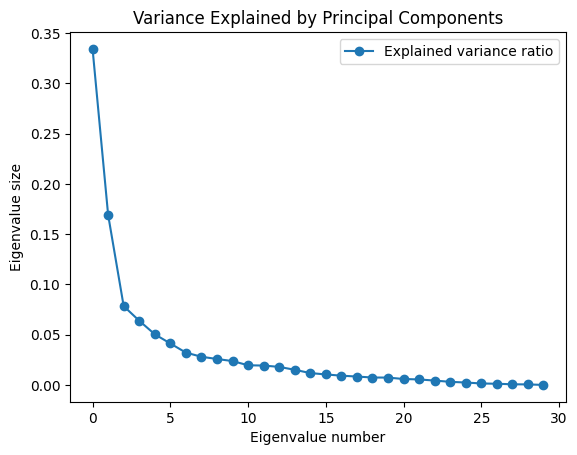

In [473]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA()
X2_pca = pca.fit_transform(X2_scaled)

# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Plot scree plot
plt.plot(explained_variance, marker='o', label = 'Explained variance ratio')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Variance Explained by Principal Components")
plt.legend()
plt.show()

### Trade-offs between Dimensionality Reduction and Model Performance

**Advantages:**
*   By reducing the number of features, dimensionality reduction techniques help combat overfitting.
*   Reduced dimensions can make the data more interpretable and easier to visualize.

**Disadvantages:**

*   Dimensionality reduction inevitably leads to some loss of information.
*  The loss of information during dimensionality reduction impacts the interpretability and performance of downstream tasks.






##**Conclusion**

In summary, PCA plays a pivotal role in dimensionality reduction, offering numerous benefits such as effective data compression, interpretability, noise reduction, and improved model performance. Its implications for real-world data analysis are far-reaching, empowering analysts and data scientists to extract actionable insights from complex datasets and make informed decisions in various domains.